Experiment with finding correlations between many pairs of coins with fixed selection of correlated coins.

In [4]:
# Historical snapshot of coins from December 01, 2019: https://coinmarketcap.com/historical/20191201/ used to
# get a representative set of coins from before the period of analysis to avoid look-ahead bias.

strat_7_univ = [
    'BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BCHUSDT', 'LTCUSDT', 'EOSUSDT', 'BNBUSDT',
    'XLMUSDT', 'TRXUSDT', 'ADAUSDT', 'XTZUSDT', 'LINKUSDT', 'ATOMUSDT',
    'NEOUSDT', 'MKRUSDT', 'DASHUSDT', 'ETCUSDT', 'USDCUSDT', 'ONTUSDT', 'VETUSDT',
    'DOGEUSDT', 'BATUSDT', 'ZECUSDT',
    'SNXUSDT', 'QTUMUSDT', 'TUSDUSDT', 'ZRXUSDT',
    'THXUSDT', 'THRUSDT', 'ALGOUSDT', 'REPUSDT', 'NANOUSDT', 'KBCUSDT', 'BTGUSDT', 'RVNUSDT', 'OMGUSDT',
    'CNXUSDT', 'ABBCUSDT', 'XINUSDT', 'VSYSUSDT', 'SEELEUSDT', 'EONUSDT', 'ZBUSDT', 'EKTUSDT', 'DGBUSDT',
    'BTMUSDT', 'LSKUSDT', 'KMDUSDT', 'SAIUSDT', 'LUNAUSDT', 'KCSUSDT', 'FTTUSDT', 'QNTUSDT', 'SXPUSDT',
    'BDXUSDT', 'GAPUSDT', 'BCDUSDT', 'THETAUSDT', 'ICXUSDT', 'FSTUSDT', 'MATICUSDT', 'SCUSDT', 'EVRUSDT',
    'BTTUSDT', 'MOFUSDT', 'IOSTUSDT', 'MCOUSDT', 'WAVESUSDT', 'XVGUSDT', 'MONAUSDT', 'BTSUSDT', 'BCNUSDT',
    'HCUSDT', 'MAIDUSDT', 'NEXOUSDT', 'ARDRUSDT', 'DXUSDT', 'OKBUSDT', 'FXCUSDT', 'RLCUSDT', 'MBUSDT',
    'BXKUSDT', 'AEUSDT', 'ENJUSDT', 'STEEMUSDT', 'SLVUSDT', 'BRZEUSDT', 'ZILUSDT', 'VESTUSDT', 'ZENUSDT',
    'SOLVEUSDT', 'CHZUSDT', 'NOAHUSDT', 'LAUSDT', 'BTMXUSDT', 'ETNUSDT', 'ENGUSDT', 'ILCUSDT', 'NPXSUSDT',
    'CRPTUSDT', 'GNTUSDT', 'SNTUSDT', 'ELFUSDT', 'JWLUSDT', 'FETUSDT', 'BOTXUSDT', 'NRGUSDT', 'DGDUSDT',
    'EXMRUSDT', 'EURSUSDT', 'AOAUSDT', 'RIFUSDT', 'CIX100USDT', 'BFUSDT', 'XZCUSDT', 'FABUSDT', 'GRINUSDT',
    'NETUSDT', 'VERIUSDT', 'DGTXUSDT', 'KNCUSDT', 'RENUSDT', 'STRATUSDT', 'ETPUSDT', 'NEXUSDT', 'NEWUSDT',
    'BCZEROUSDT', 'GXCUSDT', 'TNTUSDT', 'BTC2USDT', 'PPTUSDT', 'USDKUSDT', 'ELAUSDT', 'IGNISUSDT', 'PLCUSDT',
    'BNKUSDT', 'DTRUSDT', 'RCNUSDT', 'HPTUSDT', 'LAMBUSDT', 'MANAUSDT', 'EDCUSDT', 'BEAMUSDT', 'TTUSDT',
    'AIONUSDT', 'BZUSDT', 'WTCUSDT', 'WICCUSDT', 'LRCUSDT', 'BRDUSDT', 'FCTUSDT', 'NULSUSDT', 'FTMUSDT',
    'IOTXUSDT', 'QBITUSDT', 'XMXUSDT', 'YOUUSDT', 'NASUSDT', 'WAXPUSDT', 'ARKUSDT', 'RDDUSDT', 'GNYUSDT',
    'AGVCUSDT', 'HYNUSDT', 'CVCUSDT', 'WANUSDT', 'WINUSDT', 'LINAUSDT', 'RUSDT', 'PAIUSDT', 'FSNUSDT',
    'FUNUSDT', 'DPTUSDT', 'BHDUSDT', 'LOOMUSDT', 'XACUSDT', 'BUSDUSDT', 'BHPUSDT', 'TRUEUSDT', 'LOKIUSDT',
    'QASHUSDT', 'BNTUSDT', 'DOTUSDT', 'SOLUSDT']

In [5]:
from binance.client import Client as bnb_client
from binance.client import BinanceAPIException
from datetime import datetime
import pandas as pd

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in strat_7_univ:
        try:
            px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
            print(f"Downloaded data for {coin}.")
        except BinanceAPIException:
            print(f"Couldn't load data for {coin}.")
    
    return px_data

In [6]:
data_freq = '4h'
look_back_window_size = 30 * 6
look_back_min_periods = 10 * 6

px_data = get_price_data_for_universe(data_freq, '2020-01-01')

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for XRPUSDT.
Downloaded data for BCHUSDT.
Downloaded data for LTCUSDT.
Downloaded data for EOSUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XLMUSDT.
Downloaded data for TRXUSDT.
Downloaded data for ADAUSDT.
Downloaded data for XTZUSDT.
Downloaded data for LINKUSDT.
Downloaded data for ATOMUSDT.
Downloaded data for NEOUSDT.
Downloaded data for MKRUSDT.
Downloaded data for DASHUSDT.
Downloaded data for ETCUSDT.
Downloaded data for USDCUSDT.
Downloaded data for ONTUSDT.
Downloaded data for VETUSDT.
Downloaded data for DOGEUSDT.
Downloaded data for BATUSDT.
Downloaded data for ZECUSDT.
Downloaded data for SNXUSDT.
Downloaded data for QTUMUSDT.
Downloaded data for TUSDUSDT.
Downloaded data for ZRXUSDT.
Couldn't load data for THXUSDT.
Couldn't load data for THRUSDT.
Downloaded data for ALGOUSDT.
Couldn't load data for REPUSDT.
Couldn't load data for NANOUSDT.
Couldn't load data for KBCUSDT.
Couldn't load data 

In [33]:
px_close = {coin: px_data[coin]["close"] for coin in px_data}
px_close = pd.DataFrame(px_close)
# px_close.set_index("open_time", inplace=True)
px_close.index.rename("date", inplace=True)
px_close = px_close.astype(float)

px_close

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,7230.71,130.18,0.19406,205.64,41.58,NaN,13.8159,0.04515,NaN,0.03308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.19518,206.72,41.55,NaN,13.7648,0.04493,NaN,0.03320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.19358,205.61,41.67,NaN,13.7162,0.04509,NaN,0.03321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.19428,206.63,41.89,NaN,13.7958,0.04542,NaN,0.03357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.19474,206.35,41.79,NaN,13.7270,0.04547,NaN,0.03361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-19 00:00:00,105026.35,3335.78,3.25510,462.90,124.65,0.9100,711.0600,0.48590,NaN,1.08540,...,0.5268,0.1996,0.6735,0.04641,0.04657,0.06007,NaN,0.664,7.053,255.76
2025-01-19 04:00:00,105249.96,3280.49,3.17950,457.10,120.07,0.8854,703.2200,0.47550,NaN,1.06770,...,0.5039,0.1995,0.6450,0.04500,0.04657,0.06007,NaN,0.666,6.801,271.81
2025-01-19 08:00:00,104614.11,3147.58,3.05460,438.90,115.12,0.8440,680.0000,0.44950,NaN,1.02280,...,0.4762,0.1803,0.6000,0.04490,0.04028,0.06239,NaN,0.664,6.423,288.87


In [34]:
in_sample_end = pd.to_datetime("2022-12-31 20:00:00")
out_sample_start = in_sample_end + pd.DateOffset(hours=4)

px_close_in_sample = px_close.loc[:in_sample_end]
px_close_out_sample = px_close.loc[out_sample_start:]

px_close_in_sample
# px_close_out_sample

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,7230.71,130.18,0.19406,205.64,41.58,NaN,13.8159,0.04515,NaN,0.03308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.19518,206.72,41.55,NaN,13.7648,0.04493,NaN,0.03320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.19358,205.61,41.67,NaN,13.7162,0.04509,NaN,0.03321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.19428,206.63,41.89,NaN,13.7958,0.04542,NaN,0.03357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.19474,206.35,41.79,NaN,13.7270,0.04547,NaN,0.03361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 04:00:00,16565.53,1197.04,NaN,97.21,67.89,0.858,245.5269,0.07191,0.05455,0.24445,...,0.2945,0.1874,0.1983,NaN,0.0417,NaN,1.0003,0.325,4.34,9.8138
2022-12-31 08:00:00,16565.77,1197.13,NaN,97.60,68.27,0.862,245.7466,0.07182,0.05455,0.24670,...,0.2945,0.1879,0.1992,NaN,0.0419,NaN,1.0003,0.325,4.36,9.8432
2022-12-31 12:00:00,16587.69,1202.01,NaN,97.60,70.09,0.866,247.0076,0.07189,0.05466,0.25008,...,0.2945,0.1915,0.2012,NaN,0.0418,NaN,1.0005,0.328,4.39,10.1323


In [266]:
def get_max_entry(high_corr_map):
    max_corr = -1.0
    max_key = None
    for key in high_corr_map.keys():
        if high_corr_map[key] > max_corr:
            max_corr = high_corr_map[key]
            max_key = key
    return max_key[0], max_key[1], max_corr

def get_min_entry(high_corr_map):
    min_corr = 1.0
    min_key = None
    for key in high_corr_map.keys():
        if high_corr_map[key] < min_corr:
            min_corr = high_corr_map[key]
            min_key = key
    return min_key[0], min_key[1], min_corr

def get_corr_match_map(px_signal, use_min_corr=False):
    corr_matrix = px_signal.corr()
    high_corr_map = dict()
    corr_match_map = dict()
    for coin_a in corr_matrix.index:
        for coin_b in corr_matrix.index:
            if coin_a < coin_b and corr_matrix[coin_a][coin_b] > 0.9:
                #print(coin_a, coin_b, corr_matrix[coin_a][coin_b])
                high_corr_map[(coin_a, coin_b)] = corr_matrix[coin_a][coin_b]

    while len(high_corr_map) > 0:
        coin_a, coin_b, corr_a_b = get_max_entry(high_corr_map)
        if use_min_corr:
            coin_a, coin_b, corr_a_b = get_min_entry(high_corr_map)
        del high_corr_map[(coin_a, coin_b)]
        if coin_a not in corr_match_map and coin_b not in corr_match_map:
            corr_match_map[coin_a] = (coin_b, corr_a_b)
            corr_match_map[coin_b] = (coin_a, corr_a_b)

    return corr_match_map

In [267]:
corr_match_map = get_corr_match_map(px_close_in_sample)
corr_match_map

{'OMGUSDT': ('ZENUSDT', 0.9927769545486754),
 'ZENUSDT': ('OMGUSDT', 0.9927769545486754),
 'DOTUSDT': ('XLMUSDT', 0.9908822490589636),
 'XLMUSDT': ('DOTUSDT', 0.9908822490589636),
 'ADAUSDT': ('ENJUSDT', 0.9867785609306907),
 'ENJUSDT': ('ADAUSDT', 0.9867785609306907),
 'WAXPUSDT': ('ZRXUSDT', 0.985901456993207),
 'ZRXUSDT': ('WAXPUSDT', 0.985901456993207),
 'LRCUSDT': ('VETUSDT', 0.9804799681243638),
 'VETUSDT': ('LRCUSDT', 0.9804799681243638),
 'ALGOUSDT': ('LINKUSDT', 0.9784984066312689),
 'LINKUSDT': ('ALGOUSDT', 0.9784984066312689),
 'BCHUSDT': ('BNTUSDT', 0.9749863918865764),
 'BNTUSDT': ('BCHUSDT', 0.9749863918865764),
 'MANAUSDT': ('NEOUSDT', 0.9734164474679909),
 'NEOUSDT': ('MANAUSDT', 0.9734164474679909),
 'EOSUSDT': ('ETHUSDT', 0.9678384266699815),
 'ETHUSDT': ('EOSUSDT', 0.9678384266699815),
 'LSKUSDT': ('ONTUSDT', 0.9616161041688697),
 'ONTUSDT': ('LSKUSDT', 0.9616161041688697),
 'ATOMUSDT': ('MATICUSDT', 0.9588994254753952),
 'MATICUSDT': ('ATOMUSDT', 0.9588994254753952)

In [268]:
def get_high_corr_pairs(corr_match_map):
    seen_coins = set()
    high_corr_pairs = set()

    for k, v in corr_match_map.items():
        if k not in seen_coins:
            seen_coins.add(k)
            seen_coins.add(v[0])
            high_corr_pairs.add((k, v[0]))

    return high_corr_pairs

high_corr_pairs = get_high_corr_pairs(corr_match_map)
high_corr_pairs

{('ADAUSDT', 'ENJUSDT'),
 ('ALGOUSDT', 'LINKUSDT'),
 ('ATOMUSDT', 'MATICUSDT'),
 ('BATUSDT', 'THETAUSDT'),
 ('BCHUSDT', 'BNTUSDT'),
 ('BTCUSDT', 'ZECUSDT'),
 ('BUSDUSDT', 'USDCUSDT'),
 ('DOGEUSDT', 'ETCUSDT'),
 ('DOTUSDT', 'XLMUSDT'),
 ('EOSUSDT', 'ETHUSDT'),
 ('FTMUSDT', 'LTCUSDT'),
 ('KNCUSDT', 'QNTUSDT'),
 ('LRCUSDT', 'VETUSDT'),
 ('LSKUSDT', 'ONTUSDT'),
 ('MANAUSDT', 'NEOUSDT'),
 ('OMGUSDT', 'ZENUSDT'),
 ('QTUMUSDT', 'SNXUSDT'),
 ('WAXPUSDT', 'ZRXUSDT')}

In [269]:
def get_beta_alpha_residuals(px_close_df, high_corr_pairs, interval, look_back_min_periods):
    beta_dict = dict()
    alpha_dict = dict()
    residual_dict = dict()
    
    for coin_a, coin_b in high_corr_pairs:
        px_coin_a = px_close_df[coin_a]
        px_coin_b = px_close_df[coin_b]
        cov_a_b = px_coin_a.rolling(window=interval, min_periods=look_back_min_periods).cov(px_coin_b)
        var_a = px_coin_a.rolling(window=interval, min_periods=look_back_min_periods).var()
        beta_a_to_b = cov_a_b / var_a
        beta_dict["beta_" + coin_a + "_to_" + coin_b] = beta_a_to_b
        
        a_mean = px_coin_a.rolling(window=interval, min_periods=look_back_min_periods).mean()
        b_mean = px_coin_b.rolling(window=interval, min_periods=look_back_min_periods).mean()
        alpha_a_to_b = b_mean - a_mean * beta_a_to_b
        alpha_dict["alpha_" + coin_a + "_to_" + coin_b] = alpha_a_to_b
        
        residual_dict["res_" + coin_a + "_to_" + coin_b] = px_coin_b - alpha_a_to_b - beta_a_to_b * px_coin_a
        
    beta_df = pd.DataFrame(beta_dict, index=px_close_df.index)
    alpha_df = pd.DataFrame(alpha_dict, index=px_close_df.index)
    residual_df = pd.DataFrame(residual_dict, index=px_close_df.index)
    
    return (beta_df, alpha_df, residual_df)

In [270]:
trailing_90d_beta = pd.DataFrame(index=px_close_in_sample.index)

# for (coin_a, coin_b) in high_corr_pairs:
    

# trailing_90d_beta

cov_OMG_ZEN = px_close_in_sample['OMGUSDT'].rolling(window=look_back_window_size, min_periods=look_back_min_periods).cov(px_close_in_sample['ZENUSDT'])
var_OMG = px_close_in_sample['OMGUSDT'].rolling(window=look_back_window_size, min_periods=look_back_min_periods).var()
beta_OMG_to_ZEN = cov_OMG_ZEN / var_OMG

In [271]:
OMG_mean = px_close_in_sample['OMGUSDT'].rolling(window=look_back_window_size, min_periods=look_back_min_periods).mean()
ZEN_mean = px_close_in_sample['ZENUSDT'].rolling(window=look_back_window_size, min_periods=look_back_min_periods).mean()

In [272]:
alpha_OMG_to_ZEN = ZEN_mean - OMG_mean * beta_OMG_to_ZEN
alpha_OMG_to_ZEN

date
2020-01-01 00:00:00         NaN
2020-01-01 04:00:00         NaN
2020-01-01 08:00:00         NaN
2020-01-01 12:00:00         NaN
2020-01-01 16:00:00         NaN
                         ...   
2022-12-31 04:00:00   -0.083006
2022-12-31 08:00:00   -0.120030
2022-12-31 12:00:00   -0.159639
2022-12-31 16:00:00   -0.202816
2022-12-31 20:00:00   -0.227885
Length: 6571, dtype: float64

In [273]:
px_close_in_sample['ZENUSDT'] - alpha_OMG_to_ZEN - px_close_in_sample['OMGUSDT'] * beta_OMG_to_ZEN

date
2020-01-01 00:00:00         NaN
2020-01-01 04:00:00         NaN
2020-01-01 08:00:00         NaN
2020-01-01 12:00:00         NaN
2020-01-01 16:00:00         NaN
                         ...   
2022-12-31 04:00:00    0.078901
2022-12-31 08:00:00    0.186788
2022-12-31 12:00:00    0.166779
2022-12-31 16:00:00    0.135708
2022-12-31 20:00:00    0.195781
Length: 6571, dtype: float64

<Axes: xlabel='date'>

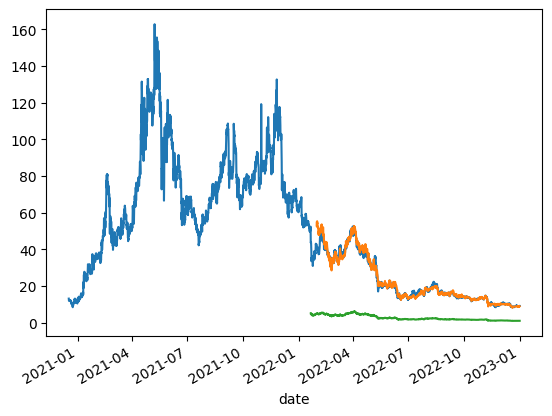

In [274]:
px_close_in_sample['ZENUSDT'].plot()
(alpha_OMG_to_ZEN + px_close_in_sample['OMGUSDT'] * beta_OMG_to_ZEN).plot()
px_close_in_sample['OMGUSDT'].plot()

In [275]:
beta_df, alpha_df, residual_df = get_beta_alpha_residuals(
    px_close_in_sample, high_corr_pairs, look_back_window_size, look_back_min_periods)
residual_df

,res_ADAUSDT_to_ENJUSDT,res_QTUMUSDT_to_SNXUSDT,res_EOSUSDT_to_ETHUSDT,res_MANAUSDT_to_NEOUSDT,res_ATOMUSDT_to_MATICUSDT,res_BUSDUSDT_to_USDCUSDT,res_DOTUSDT_to_XLMUSDT,res_BTCUSDT_to_ZECUSDT,res_DOGEUSDT_to_ETCUSDT,res_OMGUSDT_to_ZENUSDT,res_KNCUSDT_to_QNTUSDT,res_WAXPUSDT_to_ZRXUSDT,res_LSKUSDT_to_ONTUSDT,res_BATUSDT_to_THETAUSDT,res_ALGOUSDT_to_LINKUSDT,res_FTMUSDT_to_LTCUSDT,res_LRCUSDT_to_VETUSDT,res_BCHUSDT_to_BNTUSDT
date,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 04:00:00,-0.008246,0.028995,-1.923376,-0.085836,-0.083771,0.000349,-0.000702,-2.218132,0.291281,0.078901,4.416808,0.000113,-0.013732,0.010841,-0.329218,2.666004,0.000453,-0.000511
2022-12-31 08:00:00,-0.007059,0.040129,-3.861872,-0.077867,-0.087308,0.000263,-0.001026,-2.185873,0.140495,0.186788,4.361202,-0.000326,-0.010910,0.010197,-0.292005,2.771184,0.000551,-0.002108
2022-12-31 12:00:00,-0.006856,0.016796,-1.049094,-0.075308,-0.080939,0.000244,-0.001307,-1.926169,0.304763,0.166779,5.031019,0.000356,-0.010396,0.014297,-0.280746,4.022457,0.000384,0.000873


In [276]:
beta_df

,beta_ADAUSDT_to_ENJUSDT,beta_QTUMUSDT_to_SNXUSDT,beta_EOSUSDT_to_ETHUSDT,beta_MANAUSDT_to_NEOUSDT,beta_ATOMUSDT_to_MATICUSDT,beta_BUSDUSDT_to_USDCUSDT,beta_DOTUSDT_to_XLMUSDT,beta_BTCUSDT_to_ZECUSDT,beta_DOGEUSDT_to_ETCUSDT,beta_OMGUSDT_to_ZENUSDT,beta_KNCUSDT_to_QNTUSDT,beta_WAXPUSDT_to_ZRXUSDT,beta_LSKUSDT_to_ONTUSDT,beta_BATUSDT_to_THETAUSDT,beta_ALGOUSDT_to_LINKUSDT,beta_FTMUSDT_to_LTCUSDT,beta_LRCUSDT_to_VETUSDT,beta_BCHUSDT_to_BNTUSDT
date,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 04:00:00,0.855091,0.966064,565.694118,7.888265,0.101433,0.108348,0.012212,0.007966,136.135573,8.828227,109.894042,2.432112,0.204729,2.532634,20.968476,269.456164,0.062735,0.004180
2022-12-31 08:00:00,0.857039,0.964807,565.535438,7.928747,0.102117,0.074155,0.012190,0.008008,136.218439,8.865471,109.874304,2.438827,0.205199,2.508567,20.957541,268.147013,0.062465,0.004181
2022-12-31 12:00:00,0.859467,0.966645,565.601617,7.989697,0.102195,0.085575,0.012169,0.008047,135.955225,8.905087,109.521709,2.445890,0.205644,2.484186,20.891614,268.593021,0.062429,0.004179


In [277]:
def get_normalized_residuals(residual_df, interval, look_back_min_periods):
    demeaned_residuals = residual_df.subtract(residual_df.rolling(window=interval, min_periods=look_back_min_periods).mean(), axis=0)
    normalized_residuals = demeaned_residuals.divide(residual_df.rolling(window=interval, min_periods=look_back_min_periods).std(), axis=0)
    return normalized_residuals

In [278]:
normalized_residuals = get_normalized_residuals(residual_df, look_back_window_size, look_back_min_periods)
normalized_residuals

,res_ADAUSDT_to_ENJUSDT,res_QTUMUSDT_to_SNXUSDT,res_EOSUSDT_to_ETHUSDT,res_MANAUSDT_to_NEOUSDT,res_ATOMUSDT_to_MATICUSDT,res_BUSDUSDT_to_USDCUSDT,res_DOTUSDT_to_XLMUSDT,res_BTCUSDT_to_ZECUSDT,res_DOGEUSDT_to_ETCUSDT,res_OMGUSDT_to_ZENUSDT,res_KNCUSDT_to_QNTUSDT,res_WAXPUSDT_to_ZRXUSDT,res_LSKUSDT_to_ONTUSDT,res_BATUSDT_to_THETAUSDT,res_ALGOUSDT_to_LINKUSDT,res_FTMUSDT_to_LTCUSDT,res_LRCUSDT_to_VETUSDT,res_BCHUSDT_to_BNTUSDT
date,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 04:00:00,-1.868753,0.403972,-0.049507,-0.544690,-2.244286,1.485723,0.461731,-0.743768,1.559278,-0.467822,0.630855,-0.047856,-1.016506,0.419990,-0.662493,0.624856,2.171684,0.185253
2022-12-31 08:00:00,-1.637854,0.515354,-0.109792,-0.508631,-2.286832,1.285050,0.246898,-0.723712,1.360986,-0.010789,0.607141,-0.192391,-0.612033,0.399103,-0.584466,0.661006,2.399508,0.039218
2022-12-31 12:00:00,-1.580849,0.260197,-0.009288,-0.494201,-2.089827,1.237885,0.061832,-0.625186,1.539741,-0.103165,0.785476,0.012184,-0.534779,0.567273,-0.555283,0.917785,1.926429,0.289985


In [279]:
import re

x = "res_ALGOUSDT_to_LINKUSDT"
p = re.compile('res_([A-Z]+)_to_([A-Z]+)')
m = p.match(x)
m.group(2)

'LINKUSDT'

In [280]:
import re

def create_raw_holdings_df(corr_match_map, normalized_residuals, threshold, beta_df_input):
    holdings_df = pd.DataFrame(0.0, columns=corr_match_map.keys(), index=normalized_residuals.index)

    reg_exp = re.compile('res_([A-Z]+)_to_([A-Z]+)')

    for entry_date, row in normalized_residuals.iterrows():
        for item in row.items():
            if not pd.isnull(item[1]) and item[1] > threshold:
                res_column = item[0]
                reg_exp_match = reg_exp.match(res_column)
                dependent_coin = reg_exp_match.group(1)
                independent_coin = reg_exp_match.group(2)

                holdings_df.loc[entry_date, independent_coin] = -1.0
                beta_column = "beta" + res_column[3:]
                holdings_df.loc[entry_date, dependent_coin] = beta_df_input.loc[entry_date, beta_column]
            elif not pd.isnull(item[1]) and item[1] < -threshold:
                res_column = item[0]
                reg_exp_match = reg_exp.match(res_column)
                dependent_coin = reg_exp_match.group(1)
                independent_coin = reg_exp_match.group(2)

                holdings_df.loc[entry_date, independent_coin] = 1.0
                beta_column = "beta" + res_column[3:]
                holdings_df.loc[entry_date, dependent_coin] = -beta_df_input.loc[entry_date, beta_column]

                #print(entry_date, dependent_coin, independent_coin)
    return holdings_df.shift()

In [281]:
threshold = 1.0

raw_holdings_df = create_raw_holdings_df(corr_match_map, normalized_residuals, threshold, beta_df)
raw_holdings_df.tail(10)

,OMGUSDT,ZENUSDT,DOTUSDT,XLMUSDT,ADAUSDT,ENJUSDT,WAXPUSDT,ZRXUSDT,LRCUSDT,VETUSDT,...,BUSDUSDT,USDCUSDT,DOGEUSDT,ETCUSDT,KNCUSDT,QNTUSDT,BATUSDT,THETAUSDT,FTMUSDT,LTCUSDT
date,,,,,,,,,,,,,,,,,,,,,
2022-12-30 08:00:00,0.0,0.0,0.000000,0.0,-0.839181,1.0,-2.425386,1.0,0.000000,0.0,...,0.231990,-1.0,136.961629,-1.0,105.776225,-1.0,0.0,0.0,0.0,0.0
2022-12-30 12:00:00,0.0,0.0,0.012391,-1.0,-0.841612,1.0,-2.425690,1.0,0.000000,0.0,...,0.204315,-1.0,136.899104,-1.0,106.796500,-1.0,0.0,0.0,0.0,0.0
2022-12-30 16:00:00,0.0,0.0,0.012345,-1.0,-0.844987,1.0,-2.428035,1.0,0.063479,-1.0,...,0.170193,-1.0,136.912216,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0
2022-12-30 20:00:00,0.0,0.0,0.000000,0.0,-0.848467,1.0,-2.434354,1.0,0.063423,-1.0,...,0.158768,-1.0,136.703228,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0
2022-12-31 00:00:00,0.0,0.0,0.000000,0.0,-0.850921,1.0,0.000000,0.0,0.063198,-1.0,...,0.150969,-1.0,136.556858,-1.0,110.082722,-1.0,0.0,0.0,0.0,0.0
2022-12-31 04:00:00,0.0,0.0,0.000000,0.0,-0.852929,1.0,0.000000,0.0,0.062972,-1.0,...,0.119383,-1.0,136.369210,-1.0,109.465651,-1.0,0.0,0.0,0.0,0.0
2022-12-31 08:00:00,0.0,0.0,0.000000,0.0,-0.855091,1.0,0.000000,0.0,0.062735,-1.0,...,0.108348,-1.0,136.135573,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0
2022-12-31 12:00:00,0.0,0.0,0.000000,0.0,-0.857039,1.0,0.000000,0.0,0.062465,-1.0,...,0.074155,-1.0,136.218439,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0
2022-12-31 16:00:00,0.0,0.0,0.000000,0.0,-0.859467,1.0,0.000000,0.0,0.062429,-1.0,...,0.085575,-1.0,135.955225,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [282]:
def get_normalized_holdings_df(raw_holdings_df):
    normalized_holdings_df = raw_holdings_df.divide(raw_holdings_df.abs().sum(axis=1), axis=0)
    return normalized_holdings_df.fillna(0.0)

In [283]:
normalized_holdings_df = get_normalized_holdings_df(raw_holdings_df)
normalized_holdings_df

,OMGUSDT,ZENUSDT,DOTUSDT,XLMUSDT,ADAUSDT,ENJUSDT,WAXPUSDT,ZRXUSDT,LRCUSDT,VETUSDT,...,BUSDUSDT,USDCUSDT,DOGEUSDT,ETCUSDT,KNCUSDT,QNTUSDT,BATUSDT,THETAUSDT,FTMUSDT,LTCUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2020-01-01 04:00:00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2020-01-01 08:00:00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2020-01-01 12:00:00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2020-01-01 16:00:00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 04:00:00,0.0,0.0,0.0,0.0,-0.003372,0.003953,0.0,0.0,0.000249,-0.003953,...,0.000472,-0.003953,0.539071,-0.003953,0.43272,-0.003953,0.0,0.0,0.0,0.0
2022-12-31 08:00:00,0.0,0.0,0.0,0.0,-0.005960,0.006970,0.0,0.0,0.000437,-0.006970,...,0.000755,-0.006970,0.948892,-0.006970,0.00000,0.000000,0.0,0.0,0.0,0.0
2022-12-31 12:00:00,0.0,0.0,0.0,0.0,-0.006022,0.007027,0.0,0.0,0.000439,-0.007027,...,0.000521,-0.007027,0.957167,-0.007027,0.00000,0.000000,0.0,0.0,0.0,0.0


In [284]:
def calculate_holdings_returns(px_close_df, normalized_holdings_df):
    px_returns = px_close_df / px_close_df.shift() - 1
    return (px_returns * normalized_holdings_df).sum(axis=1)

def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias.
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

<Axes: xlabel='date'>

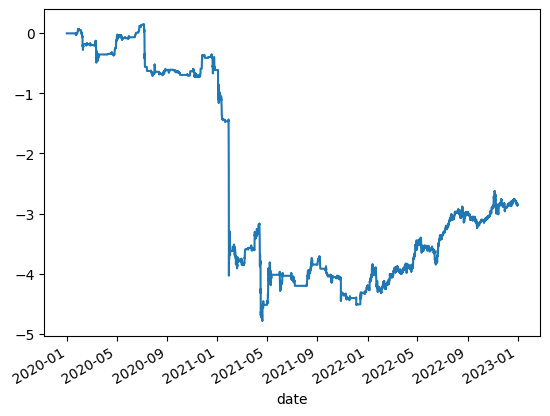

In [285]:
strategy_returns = calculate_holdings_returns(px_close_in_sample, normalized_holdings_df)
strategy_returns.cumsum().plot()

In [286]:
def get_strategy_returns(px_close_df, px_close_signal_df, corr_match_map, interval, look_back_min_periods,
                         threshold):
    high_corr_pairs = get_high_corr_pairs(corr_match_map)
    
    beta_df, alpha_df, residuals_df = get_beta_alpha_residuals(
        px_close_signal_df, high_corr_pairs, interval, look_back_min_periods)
    normalized_residuals = get_normalized_residuals(residuals_df, look_back_window_size, look_back_min_periods)
    raw_holdings_df = create_raw_holdings_df(corr_match_map, normalized_residuals, threshold, beta_df)
    normalized_holdings_df = get_normalized_holdings_df(raw_holdings_df)
    
    px_close_returns = px_close_df / px_close_df.shift() - 1
    
    #return calculate_holdings_returns(px_close_returns, normalized_holdings_df)
    return get_net_return(normalized_holdings_df, px_close_returns)

In [349]:
def get_sharpe_ratio_for_different_thresholds(px_close_df, px_close_signal_df, corr_match_map, interval,
                                              look_back_min_periods):
    sr_dict = { "in sample": [], "out of sample": []}
    thresholds = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0]
    for threshold in thresholds:
        net_returns = get_strategy_returns(px_close_df, px_close_signal_df, corr_match_map, interval, look_back_min_periods,
                         threshold)
        in_sample_net_returns = net_returns.loc[:pd.to_datetime("2022-12-31 20:00:00")]
        out_of_sample_net_returns = net_returns.loc[pd.to_datetime("2023-01-01 00:00:00"):]
        
        sr_dict["in sample"].append(in_sample_net_returns.mean() / in_sample_net_returns.std() * np.sqrt(365 * 6))
        sr_dict["out of sample"].append(out_of_sample_net_returns.mean() / out_of_sample_net_returns.std() * np.sqrt(365 * 6))
    return pd.DataFrame(sr_dict, index=thresholds)

## px_close as signal ranked by px_close until the end of 2022

In [357]:
threshold = 0.5

corr_match_map = get_corr_match_map(px_close.loc[:pd.to_datetime("2022-12-31 20:00:00")])

in_sample_strategy_returns = get_strategy_returns(
    px_close_in_sample, px_close_in_sample, corr_match_map, look_back_window_size,
    look_back_min_periods, threshold)
in_sample_strategy_returns

date
2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000000
2020-01-01 12:00:00    0.000000
2020-01-01 16:00:00    0.000000
                         ...   
2022-12-31 04:00:00    0.003774
2022-12-31 08:00:00    0.005246
2022-12-31 12:00:00    0.007346
2022-12-31 16:00:00   -0.002964
2022-12-31 20:00:00   -0.004554
Length: 6571, dtype: float64

<Axes: xlabel='date'>

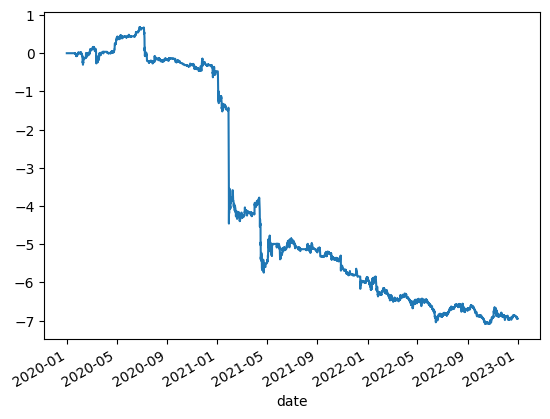

In [358]:
in_sample_strategy_returns.cumsum().plot()

In [359]:
threshold = 2.75

all_data_strategy_returns = get_strategy_returns(
    px_close, px_close, corr_match_map, look_back_window_size, look_back_min_periods,
    threshold)
all_data_strategy_returns

date
2020-01-01 00:00:00    0.0
2020-01-01 04:00:00    0.0
2020-01-01 08:00:00    0.0
2020-01-01 12:00:00    0.0
2020-01-01 16:00:00    0.0
                      ... 
2025-01-19 00:00:00    0.0
2025-01-19 04:00:00    0.0
2025-01-19 08:00:00    0.0
2025-01-19 12:00:00    0.0
2025-01-19 16:00:00    0.0
Length: 11069, dtype: float64

<Axes: xlabel='date'>

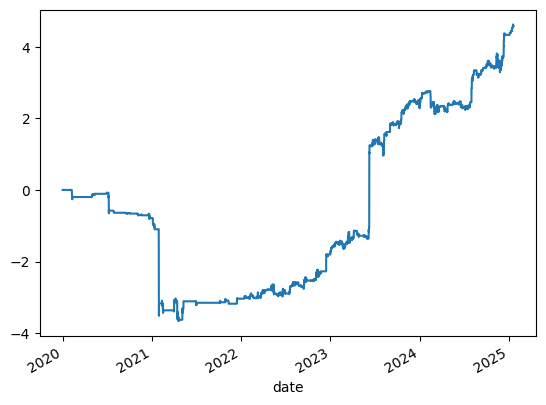

In [360]:
all_data_strategy_returns.cumsum().plot()

In [361]:
all_data_strategy_returns.mean() / all_data_strategy_returns.std() * np.sqrt(365 * 6)

0.703296659818508

In [362]:
later_strategy_returns = all_data_strategy_returns[pd.to_datetime("2023-01-01 00:00:00"):]
later_strategy_returns.mean() / later_strategy_returns.std() * np.sqrt(365 * 6)

1.9304979845784662

In [363]:
get_sharpe_ratio_for_different_thresholds(px_close, px_close, corr_match_map, look_back_window_size,
                                          look_back_min_periods)

,in sample,out of sample
0.25,-1.452605,1.019464
0.50,-1.591137,1.182877
0.75,-1.412359,0.941055
1.00,-1.455079,1.004628
1.50,-1.420901,2.279330
2.00,-1.227127,2.036778
2.50,-0.876314,1.765102
3.00,-0.749681,1.778891


## Logarithm of px_close as signal ranked by correlation of px_close

In [364]:
import numpy as np

threshold = 2.0

corr_match_map = get_corr_match_map(px_close.loc[:pd.to_datetime("2022-12-31 20:00:00")])

all_data_log_strategy_returns = get_strategy_returns(px_close, np.log(px_close), corr_match_map,
                                                     look_back_window_size, look_back_min_periods, threshold)
all_data_log_strategy_returns

date
2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000000
2020-01-01 12:00:00    0.000000
2020-01-01 16:00:00    0.000000
                         ...   
2025-01-19 00:00:00    0.000000
2025-01-19 04:00:00    0.000000
2025-01-19 08:00:00    0.000000
2025-01-19 12:00:00    0.037724
2025-01-19 16:00:00   -0.002000
Length: 11069, dtype: float64

<Axes: xlabel='date'>

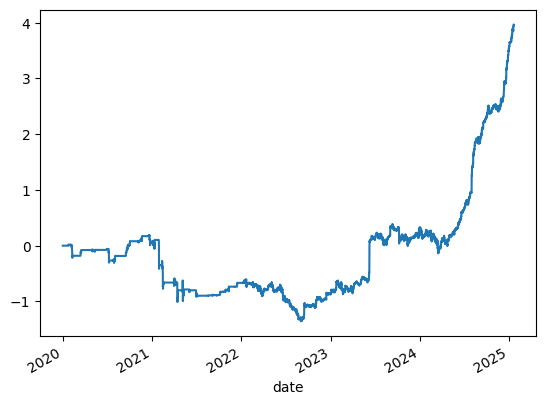

In [365]:
all_data_log_strategy_returns.cumsum().plot()

In [366]:
all_data_log_strategy_returns.mean() / all_data_log_strategy_returns.std() * np.sqrt(365 * 6)

1.3167392231021808

In [367]:
later_log_strategy_returns = all_data_log_strategy_returns.loc[pd.to_datetime("2023-01-01 00:00:00"):]
later_log_strategy_returns.mean() / later_log_strategy_returns.std() * np.sqrt(365 * 6)

3.2289672493956303

In [368]:
get_sharpe_ratio_for_different_thresholds(px_close, np.log(px_close), corr_match_map,
                                          look_back_window_size, look_back_min_periods)

,in sample,out of sample
0.25,-1.325172,4.433034
0.50,-1.381540,4.320237
0.75,-1.470431,4.390639
1.00,-1.620794,4.045985
1.50,-1.983859,4.170142
2.00,-0.586164,3.228967
2.50,-0.083557,2.563527
3.00,0.057583,2.549596


## Logarithm of px_close as signal ranked by correlation of log px_close to end of 2022

In [369]:
# get_corr_match_map(px_signal)

threshold = 2.0

log_corr_match_map = get_corr_match_map(np.log(px_close).loc[:pd.to_datetime("2022-12-31 20:00:00")])

all_data_log_strategy_with_log_corr_returns = get_strategy_returns(
    px_close, np.log(px_close), log_corr_match_map, look_back_window_size, look_back_min_periods, threshold)
all_data_log_strategy_with_log_corr_returns

date
2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000000
2020-01-01 12:00:00    0.000000
2020-01-01 16:00:00    0.000000
                         ...   
2025-01-19 00:00:00    0.010103
2025-01-19 04:00:00   -0.031407
2025-01-19 08:00:00   -0.033427
2025-01-19 12:00:00    0.037967
2025-01-19 16:00:00   -0.006821
Length: 11069, dtype: float64

<Axes: xlabel='date'>

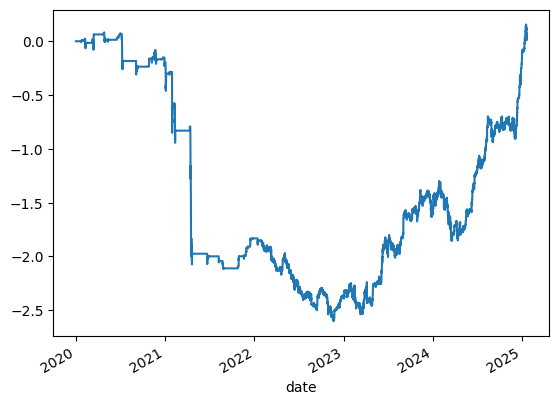

In [370]:
all_data_log_strategy_with_log_corr_returns.cumsum().plot()

In [371]:
all_data_log_strategy_with_log_corr_returns.mean() / all_data_log_strategy_with_log_corr_returns.std() * np.sqrt(365 * 6)

0.015267795335160969

In [372]:
later_log_corr_returns = all_data_log_strategy_with_log_corr_returns[pd.to_datetime("2023-01-01 00:00:00"):]
later_log_corr_returns.mean() / later_log_corr_returns.std() * np.sqrt(365 * 6)

2.0141497547349925

In [373]:
get_sharpe_ratio_for_different_thresholds(
    px_close, np.log(px_close), log_corr_match_map, look_back_window_size, look_back_min_periods)

,in sample,out of sample
0.25,-2.039857,2.370422
0.50,-2.015221,2.436252
0.75,-2.086134,2.729643
1.00,-1.768183,2.555696
1.50,-1.874895,1.907971
2.00,-1.537580,2.014150
2.50,-0.945769,1.311416
3.00,-0.780903,1.249792


## Use log price ratio as signal ranked by correlation of price to end of 2022

In [374]:
threshold = 3.0

log_return_corr_match_map = get_corr_match_map(px_close.loc[:pd.to_datetime("2022-12-31 20:00:00")])

log_return_signal = np.log(px_close) - np.log(px_close).shift()

all_data_log_return_strategy_with_price_corr = get_strategy_returns(
    px_close, log_return_signal, log_return_corr_match_map, look_back_window_size, look_back_min_periods,
    threshold)
all_data_log_return_strategy_with_price_corr

date
2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000000
2020-01-01 12:00:00    0.000000
2020-01-01 16:00:00    0.000000
                         ...   
2025-01-19 00:00:00    0.000000
2025-01-19 04:00:00    0.000000
2025-01-19 08:00:00    0.000000
2025-01-19 12:00:00    0.000000
2025-01-19 16:00:00   -0.003176
Length: 11069, dtype: float64

<Axes: xlabel='date'>

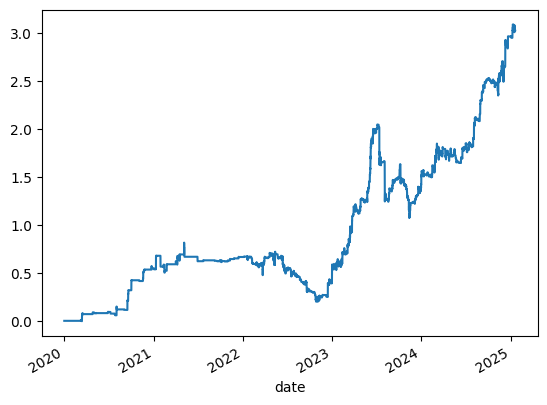

In [375]:
all_data_log_return_strategy_with_price_corr.cumsum().plot()

In [376]:
all_data_log_return_strategy_with_price_corr.mean() / all_data_log_return_strategy_with_price_corr.std() * np.sqrt(365 *6)

1.3268427658625734

In [377]:
later_log_return_with_price_corr = all_data_log_return_strategy_with_price_corr[pd.to_datetime("2023-01-01 00:00:00"):]
later_log_return_with_price_corr.mean() / later_log_return_with_price_corr.std() * np.sqrt(365 * 6)

1.9981555129604904

In [378]:
get_sharpe_ratio_for_different_thresholds(
    px_close, log_return_signal, log_return_corr_match_map, look_back_window_size, look_back_min_periods)

,in sample,out of sample
0.25,-4.388560,-10.880929
0.50,-4.030746,-8.627063
0.75,-3.564160,-4.270259
1.00,-2.861550,-2.503636
1.50,-1.521118,0.486422
2.00,-1.392105,1.765416
2.50,0.062496,2.420460
3.00,0.555184,1.998156


## Use log price ratio as signal ranked by correlation of log price ratio to end of 2022

In [305]:
threshold = 1.0

log_price_ratio_signal = np.log(px_close) - np.log(px_close).shift()

log_price_ratio_corr_match_map = get_corr_match_map(
    log_price_ratio_signal.loc[:pd.to_datetime("2022-12-31 20:00:00")])

all_data_log_price_ratio_strategy_with_log_price_ratio_corr = get_strategy_returns(
    px_close, log_price_ratio_signal, log_price_ratio_corr_match_map, look_back_window_size,
    look_back_min_periods, threshold)
all_data_log_price_ratio_strategy_with_log_price_ratio_corr

date
2020-01-01 00:00:00    0.0
2020-01-01 04:00:00    0.0
2020-01-01 08:00:00    0.0
2020-01-01 12:00:00    0.0
2020-01-01 16:00:00    0.0
                      ... 
2025-01-19 00:00:00    0.0
2025-01-19 04:00:00    0.0
2025-01-19 08:00:00    0.0
2025-01-19 12:00:00    0.0
2025-01-19 16:00:00    0.0
Length: 11069, dtype: float64

<Axes: xlabel='date'>

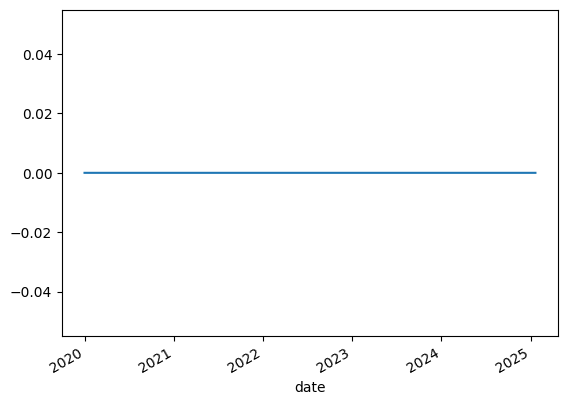

In [306]:
all_data_log_price_ratio_strategy_with_log_price_ratio_corr.cumsum().plot()

# No highly correlated log ratio of prices.

## px_close as signal ranked by corr of px_close up until end of 2022, take smallest corr

Idea: We look at pairs of coins which have a correlation above 0.9 (as in the above cases) but instead of pairing the most highly correlated pairs above this threshold, we pair the least correlated (i.e. closest to 0.9 from above).

Intuition: We want to pick pairs of coins which are highly correlated (e.g. with correlation > 0.9) so that it's likely that price gaps will eventually close and that we can profit from those; however, if the coins are extremely correlated, it's also unlikely that these price mismatches will occur so we want them to vary a little bit (and then move back together). We try to find such pairs of coins by picking ones which have correlations as close to 0.9 from above as possible.

In [307]:
threshold = 1.0

min_max_price_match_map = get_corr_match_map(px_close.loc[:pd.to_datetime("2022-12-31 20:00:00")], True)

all_data_price_strategy_min_max_price_corr = get_strategy_returns(
    px_close, px_close, min_max_price_match_map, look_back_window_size,
    look_back_min_periods, threshold)
all_data_price_strategy_min_max_price_corr

date
2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000000
2020-01-01 12:00:00    0.000000
2020-01-01 16:00:00    0.000000
                         ...   
2025-01-19 00:00:00    0.000344
2025-01-19 04:00:00    0.002966
2025-01-19 08:00:00   -0.004271
2025-01-19 12:00:00    0.000687
2025-01-19 16:00:00   -0.000104
Length: 11069, dtype: float64

<Axes: xlabel='date'>

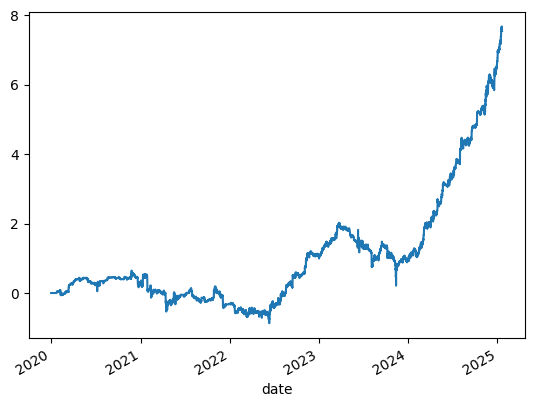

In [308]:
all_data_price_strategy_min_max_price_corr.cumsum().plot()

In [309]:
all_data_price_strategy_min_max_price_corr.mean() / all_data_price_strategy_min_max_price_corr.std() * np.sqrt(365 * 5)

1.3609842571347948

In [311]:
late_price_strategy_min_max_price_corr = all_data_price_strategy_min_max_price_corr[pd.to_datetime("2023-01-01 00:00:00"):]
late_price_strategy_min_max_price_corr.mean() / late_price_strategy_min_max_price_corr.std() * np.sqrt(365 * 6)

2.4201282977003813

In [379]:
get_sharpe_ratio_for_different_thresholds(
    px_close, px_close, min_max_price_match_map, look_back_window_size, look_back_min_periods)

,in sample,out of sample
0.25,1.073269,1.599153
0.50,0.817455,1.769880
0.75,0.795572,1.686108
1.00,0.506914,2.420128
1.50,0.642630,2.471863
2.00,0.520190,2.190173
2.50,0.312652,2.661351
3.00,0.097946,2.777604


## Logarithm of px_close as signal ranked by correlation of px_close until end of 2022, take smallest corr

In [312]:
threshold = 1.0

min_max_price_match_map = get_corr_match_map(px_close.loc[:pd.to_datetime("2022-12-31 20:00:00")], True)

all_data_log_strategy_min_max_price_corr = get_strategy_returns(
    px_close, np.log(px_close), min_max_price_match_map, look_back_window_size, look_back_min_periods,
    threshold)
all_data_log_strategy_min_max_price_corr

date
2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000000
2020-01-01 12:00:00    0.000000
2020-01-01 16:00:00    0.000000
                         ...   
2025-01-19 00:00:00    0.003484
2025-01-19 04:00:00    0.013750
2025-01-19 08:00:00    0.002237
2025-01-19 12:00:00    0.013815
2025-01-19 16:00:00   -0.003301
Length: 11069, dtype: float64

<Axes: xlabel='date'>

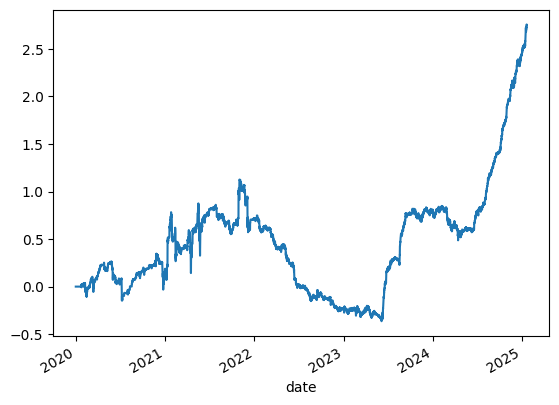

In [313]:
all_data_log_strategy_min_max_price_corr.cumsum().plot()

In [314]:
all_data_log_strategy_min_max_price_corr.mean() / all_data_log_strategy_min_max_price_corr.std() * np.sqrt(365 * 6)

1.1454140583172499

In [315]:
later_log_strategy_min_max_price_corr = all_data_log_strategy_min_max_price_corr.loc[pd.to_datetime("2023-01-01 00:00:00"):]
later_log_strategy_min_max_price_corr.mean() / later_log_strategy_min_max_price_corr.std() * np.sqrt(365 * 6)

4.338141496455305

## Logarithm of px_close as signal ranked by correlation of log px_close to end of 2022, take smallest corr

In [329]:
threshold = 2.0

min_max_log_corr_match_map = get_corr_match_map(
    np.log(px_close).loc[:pd.to_datetime("2022-12-31 20:00:00")], True)

all_data_log_strategy_with_min_max_log_corr_returns = get_strategy_returns(
    px_close, np.log(px_close), min_max_log_corr_match_map, look_back_window_size,
    look_back_min_periods, threshold)
all_data_log_strategy_with_min_max_log_corr_returns

date
2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000000
2020-01-01 12:00:00    0.000000
2020-01-01 16:00:00    0.000000
                         ...   
2025-01-19 00:00:00    0.000000
2025-01-19 04:00:00    0.000000
2025-01-19 08:00:00   -0.075366
2025-01-19 12:00:00    0.041702
2025-01-19 16:00:00    0.001543
Length: 11069, dtype: float64

<Axes: xlabel='date'>

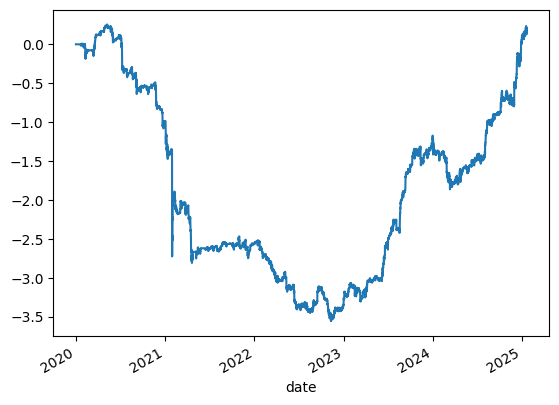

In [330]:
all_data_log_strategy_with_min_max_log_corr_returns.cumsum().plot()

In [331]:
all_data_log_strategy_with_min_max_log_corr_returns.mean() / all_data_log_strategy_with_min_max_log_corr_returns.std() * np.sqrt(365 * 6)

0.048182805418099106

In [332]:
later_log_strategy_with_min_max_log_corr_returns = all_data_log_strategy_with_min_max_log_corr_returns[pd.to_datetime("2023-01-01 00:00:00"):]
later_log_strategy_with_min_max_log_corr_returns.mean() / later_log_strategy_with_min_max_log_corr_returns.std() * np.sqrt(365 * 6)

2.5786513303534986

## Use log price ratio as signal ranked by correlation of price to end of 2022, take smallest corr

In [337]:
threshold = 1.0

min_max_log_return_corr_match_map = get_corr_match_map(
    px_close.loc[:pd.to_datetime("2022-12-31 20:00:00")], True)

log_return_signal = np.log(px_close) - np.log(px_close).shift()

all_data_log_ratio_strategy_with_min_max_price_corr = get_strategy_returns(
    px_close, log_return_signal, min_max_log_return_corr_match_map, look_back_window_size,
    look_back_min_periods, threshold)
all_data_log_ratio_strategy_with_min_max_price_corr

date
2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000000
2020-01-01 12:00:00    0.000000
2020-01-01 16:00:00    0.000000
                         ...   
2025-01-19 00:00:00   -0.002000
2025-01-19 04:00:00    0.009854
2025-01-19 08:00:00   -0.021835
2025-01-19 12:00:00    0.037073
2025-01-19 16:00:00   -0.003299
Length: 11069, dtype: float64

<Axes: xlabel='date'>

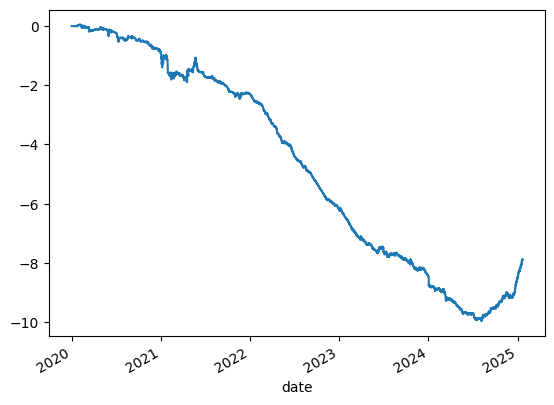

In [338]:
all_data_log_ratio_strategy_with_min_max_price_corr.cumsum().plot()

In [ ]:
all_data_log_ratio_strategy_with_min_max_price_corr